# Notes

# Load Modules

In [1]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(metR)
library(ggsignif)

Attaching SeuratObject



In [2]:
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

# Load Data

In [3]:
ss0 <- readRDS('../ss1.rds')
samples.use <- sort(unique(ss0$sample))
samples.names <- c('E12.5_E1S3','E14.5_E1S3','E16.5_E1S3','E16.5_E2S6','E16.5_E2S7')
names(samples.names) <- samples.use
ident.use <- c('RGC','GlioB','NeuB','GluNeuB','GluNeu','GABA')
cells.use <- Cells(ss0)[ss0$annot %in% ident.use & ss0$annot_niche_max %in% ident.use]

cols.use <- c("#c1636c",
              "#64ac48",
              "#ad58c5",
              "#9a963f",
              "#6980ce",
              "#cc5135",
              "#4aac8d",
              "#d3427e",
              "#c88743",
              "#bb70ad")
names(cols.use) <- levels(ss0$annot)


In [4]:
colnames(ss0@meta.data)


[1] "orig.ident"            "nCount_Spatial"        "nFeature_Spatial"     
 [4] "sample"                "nCount_SCT"            "nFeature_SCT"         
 [7] "SCT_snn_res.0.5"       "seurat_clusters"       "SCT_snn_res.0.8"      
[10] "annot"                 "nCount_Niche"          "nFeature_Niche"       
[13] "annot_niche_max"       "timepoint"             "dpt_sct"              
[16] "AP"                    "DV"                    "dpt_niche"            
[19] "dpt_niche_rank"        "dpt_niche_norm"        "lisa_dpt_niche"       
[22] "lisa_dpt_sct"          "x"                     "y"                    
[25] "niche_NTScore"         "cell_NTScore"          "env_group"            
[28] "stage_annot_env_group"

In [5]:
cols.2 <- c('grey95',gg_color_hue(2))
names(cols.2) <- c('other','vhigh','vlow')

# E14.5 E1S3 -> E16.5 E1S3

## Load Moscot results

In [80]:
moscot.2 <- read.csv('../../../../SpatComTrajectory/analysis/stereo_seq_midbrain/Moscot/E14_E16_1_cm.csv',header = T,row.names = 1)
temp <- read.csv('../../../../SpatComTrajectory/source/Moscot/ss0_E14_E1S3_loc.csv',row.names = 1)
rownames(moscot.2) <- rownames(temp)
temp <- read.csv('../../../../SpatComTrajectory/source/Moscot/ss0_E16_E1S3_loc.csv',row.names = 1)
colnames(moscot.2) <- rownames(temp)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


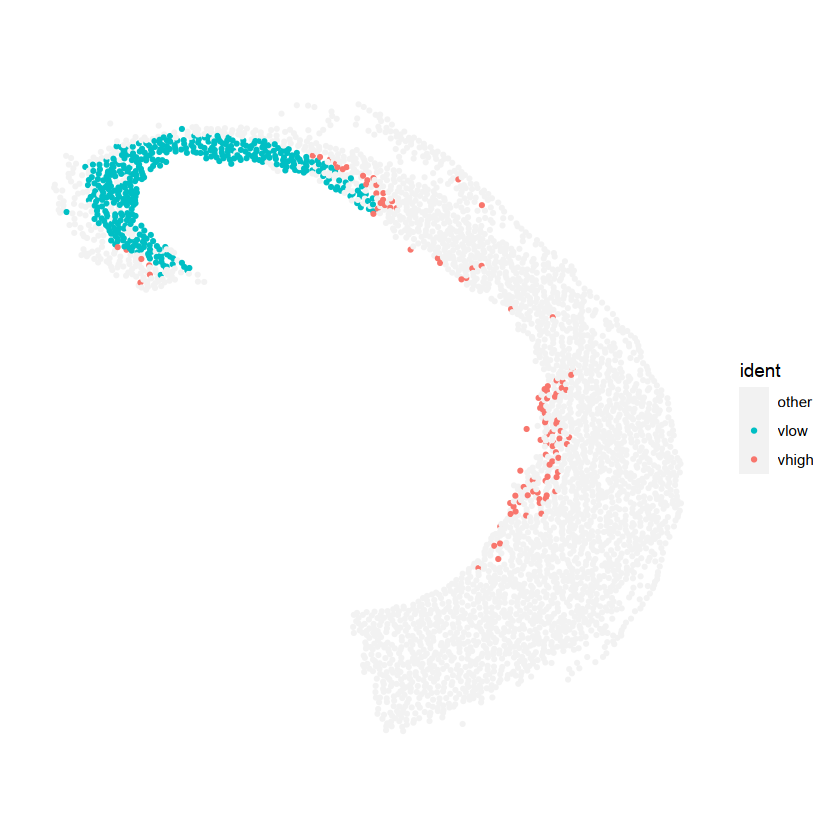

In [81]:
# progenitors by RNA in E14.5

moscot.use <- moscot.2

cells.use <- intersect(rownames(moscot.use), Cells(ss0)[ss0$annot %in% c('RGC')])
# split E14.5 progenitors into high vs low velocity
q.use <- 0.02
cells.1 <- Cells(ss0)[ss0$stage_annot_env_group == 'E14_RGC_high']
cells.2 <- Cells(ss0)[ss0$stage_annot_env_group == 'E14_RGC_low']
cells.1 <- intersect(cells.1, rownames(moscot.use))
cells.2 <- intersect(cells.2, rownames(moscot.use))
s1 <- subset(ss0,cells = rownames(moscot.use))
s1@images <- s1@images[2]
s1$pr_type <- 'other'
s1@meta.data[cells.1,'pr_type'] <- 'vhigh'
s1@meta.data[cells.2,'pr_type'] <- 'vlow'
s1$pr_type <- factor(s1$pr_type,levels = c('other','vlow','vhigh'))
Idents(s1) <- 'pr_type'
SpatialDimPlot(s1, stroke = NA, cols = cols.2, pt.size.factor = 2) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_high_env_RGC_cells_E14.pdf')

In [82]:
dim(s1@meta.data)

[1] 3654   29

In [83]:
head(s1@meta.data)

,orig.ident,nCount_Spatial,nFeature_Spatial,sample,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,SCT_snn_res.0.8,annot,⋯,dpt_niche_norm,lisa_dpt_niche,lisa_dpt_sct,x,y,niche_NTScore,cell_NTScore,env_group,stage_annot_env_group,pr_type
,<fct>,<dbl>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<fct>
E14_E1S3_170808,E14,519,258,E14_E1S3,691,256,5,6,6,Fibro,⋯,0.1838741,1.377898,-0.10267160,19886,9330,0.09351409,0.07987955,low,E14_Fibro_low,other
E14_E1S3_170916,E14,692,335,E14_E1S3,746,324,6,6,6,Fibro,⋯,0.1838367,1.401787,-0.06638440,19889,9356,0.07402967,0.07040455,low,E14_Fibro_low,other
E14_E1S3_170934,E14,719,365,E14_E1S3,754,357,5,6,6,Fibro,⋯,0.1826032,1.405813,0.05057850,19895,9306,0.09639677,0.08720056,low,E14_Fibro_low,other
E14_E1S3_171016,E14,432,234,E14_E1S3,692,229,3,2,2,GluNeuB,⋯,0.1683986,1.556831,0.05403239,19906,9134,0.15646865,0.11869399,low,E14_GluNeuB_low,other
E14_E1S3_171024,E14,558,287,E14_E1S3,709,284,3,2,2,GluNeuB,⋯,0.1689593,1.580299,0.20191547,19912,9110,0.14448389,0.11716691,low,E14_GluNeuB_low,other
E14_E1S3_171025,E14,591,305,E14_E1S3,724,297,6,10,10,Ery,⋯,0.1686229,1.574120,0.05082687,19907,9187,0.14764164,0.11469029,low,E14_Ery_low,other


In [84]:
unique(s1@meta.data$pr_type)

[1] other vlow  vhigh
Levels: other vlow vhigh

In [85]:
write.csv(s1@meta.data, 'E14_meta.csv', quote=FALSE)

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


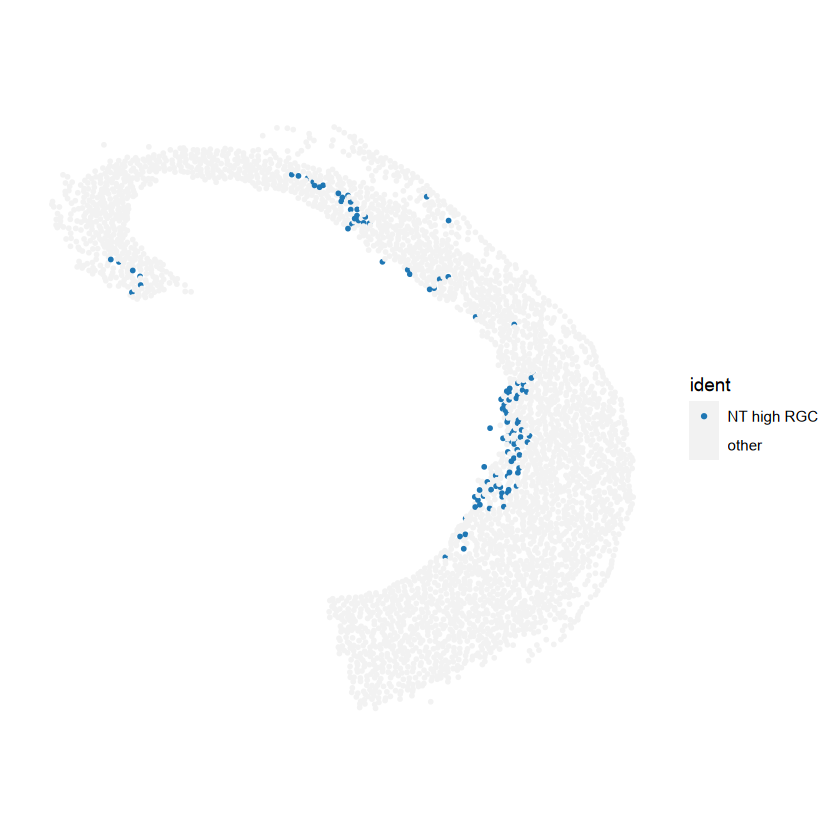

In [86]:
col.rgc = c('#1f77b4', 'gray95')
names(col.rgc) = c('NT high RGC','other')

s1.1 <- subset(ss0,cells = rownames(moscot.use))
s1.1@images <- s1.1@images[2]
s1.1$NT_status <- 'other'
s1.1@meta.data[cells.1,'NT_status'] <- 'NT high RGC'
s1.1$NT_status <- factor(s1.1$NT_status,levels = c('NT high RGC','other'))
Idents(s1.1) <- 'NT_status'
SpatialDimPlot(s1.1, stroke = NA, cols = col.rgc, pt.size.factor = 2) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_high_env_RGC_cells_E14.pdf')

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


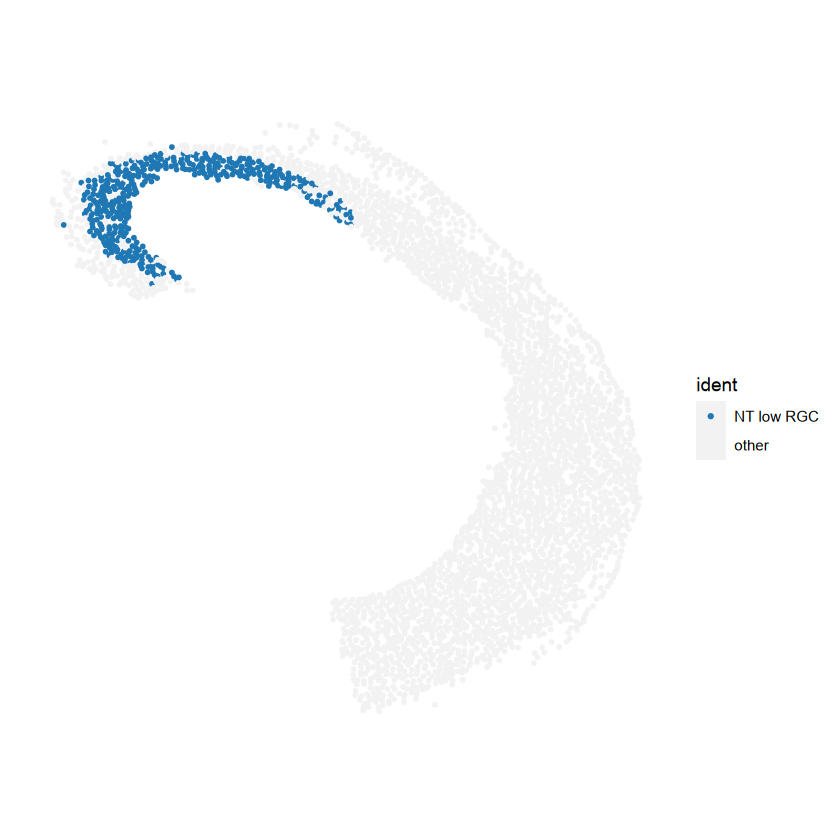

In [87]:
col.rgc = c('#1f77b4', 'gray95')
names(col.rgc) = c('NT low RGC','other')

s1.1 <- subset(ss0,cells = rownames(moscot.use))
s1.1@images <- s1.1@images[2]
s1.1$NT_status <- 'other'
s1.1@meta.data[cells.2,'NT_status'] <- 'NT low RGC'
s1.1$NT_status <- factor(s1.1$NT_status,levels = c('NT low RGC','other'))
Idents(s1.1) <- 'NT_status'
SpatialDimPlot(s1.1, stroke = NA, cols = col.rgc, pt.size.factor = 2) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_low_env_RGC_cells_E14.pdf')

In [88]:
## the up to 5 coupled E16.5 cells for every high velocity E14.5 progenitors
cp.1 <- lapply(cells.1,function(x){
  temp <- as.numeric(moscot.use[x,])
  names(temp) <- colnames(moscot.use)
  temp <- sort(temp,decreasing = T)
  head(names(temp[temp > 0]),5)
})

# the up to 5 coupled E16.5 cells for every low velocity E14.5 progenitors
cp.2 <- lapply(cells.2,function(x){
  temp <- as.numeric(moscot.use[x,])
  names(temp) <- colnames(moscot.use)
  temp <- sort(temp,decreasing = T)
  head(names(temp[temp > 0]),5)
})

In [89]:
cp.1.cells = setdiff(unlist(cp.1), unlist(cp.2))
cp.2.cells = setdiff(unlist(cp.2), unlist(cp.1))

In [90]:
s2 <- subset(ss0,cells = colnames(moscot.use))
s2@images <- s2@images[3]
s2$RGC_origin <- 'non_RGC'
s2@meta.data[intersect(cp.1.cells, Cells(s2)),'RGC_origin'] <- 'NT_high'
s2@meta.data[intersect(cp.2.cells, Cells(s2)),'RGC_origin'] <- 'NT_low'


In [91]:
head(s2@meta.data)

,orig.ident,nCount_Spatial,nFeature_Spatial,sample,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,SCT_snn_res.0.8,annot,⋯,dpt_niche_norm,lisa_dpt_niche,lisa_dpt_sct,x,y,niche_NTScore,cell_NTScore,env_group,stage_annot_env_group,RGC_origin
,<fct>,<dbl>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
E16_E1S3_21,E16,875,434,E16_E1S3,827,412,5,6,6,Fibro,⋯,0.5043735,-0.02657987,0.2171049,3343,2743,0.7906640,0.7939925,high,E16_Fibro_high,non_RGC
E16_E1S3_22,E16,1186,529,E16_E1S3,975,513,5,6,6,Fibro,⋯,0.4961124,-0.03778907,1.0745088,3319,2907,0.7831160,0.7900697,high,E16_Fibro_high,non_RGC
E16_E1S3_23,E16,1005,508,E16_E1S3,937,496,5,6,6,Fibro,⋯,0.5235123,-0.01662749,0.3043761,3316,2305,0.7578634,0.7773763,high,E16_Fibro_high,non_RGC
E16_E1S3_26,E16,1681,656,E16_E1S3,1068,601,6,9,9,Endo,⋯,0.5011214,-0.03228455,1.3491453,3310,2803,0.7911396,0.7921502,high,E16_Endo_high,non_RGC
E16_E1S3_27,E16,439,248,E16_E1S3,726,246,5,6,6,Fibro,⋯,0.5260915,-0.02641969,-0.1019577,3315,2349,0.7854566,0.7796224,high,E16_Fibro_high,non_RGC
E16_E1S3_28,E16,2882,1036,E16_E1S3,832,413,5,9,9,Endo,⋯,0.5055323,-0.03298984,1.7505487,3303,2866,0.7861022,0.7902425,high,E16_Endo_high,non_RGC


In [92]:
write.csv(s2@meta.data, 'E16_E1S3_meta.csv', quote=FALSE)

In [93]:
s2$E16_cell_type <- paste0(s2$RGC_origin, '_', s2$annot)

In [94]:
s2$E16_cell_type[s2$RGC_origin == 'non_RGC'] <- 'other_origin'
s2$E16_cell_type[s2$RGC_origin == 'NT_low'] <- 'other_origin'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_Basal'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_Ery'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_Fibro'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_Endo'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_GABA'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_GluNeu'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_GluNeuB'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_NeuB'] <- 'NeuB'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_GlioB'] <- 'GlioB'
s2$E16_cell_type[s2$E16_cell_type == 'NT_high_RGC'] <- 'RGC'

In [95]:
table(s2$E16_cell_type)


           GlioB             NeuB other_cell_types     other_origin 
              49              132              183             6234 
             RGC 
              27 

In [96]:
s2$E16_cell_type <- factor(s2$E16_cell_type,levels = c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin'))



In [97]:
cols.e16.high = c('#1f77b4', '#ff7f0e', '#2ca02c', 'gray65', 'gray95')
names(cols.e16.high) <- c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin')


In [98]:
cols.e16.high

RGC            GlioB             NeuB other_cell_types 
       "#1f77b4"        "#ff7f0e"        "#2ca02c"         "gray65" 
    other_origin 
        "gray95"

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


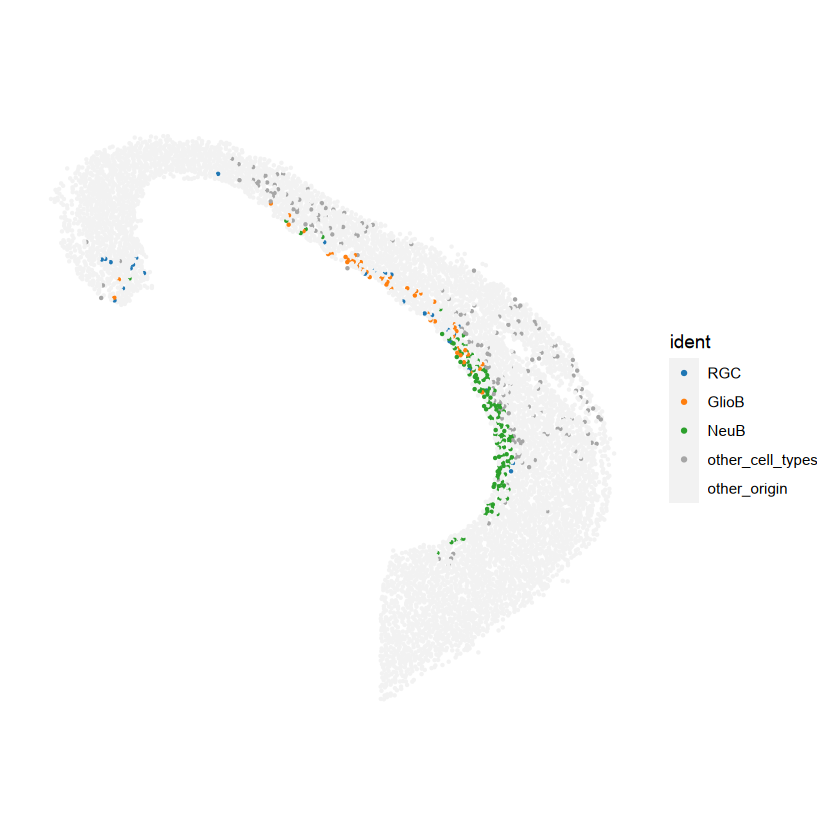

In [99]:
Idents(s2) <- 'E16_cell_type'
SpatialDimPlot(s2, stroke = NA, cols = cols.e16.high, pt.size.factor = 1.5) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_E16_E1S3_high_NT_RGC_offsprings.pdf')

In [100]:
s2$E16_cell_type <- paste0(s2$RGC_origin, '_', s2$annot)
s2$E16_cell_type[s2$RGC_origin == 'non_RGC'] <- 'other_origin'
s2$E16_cell_type[s2$RGC_origin == 'NT_high'] <- 'other_origin'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_Basal'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_Ery'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_Fibro'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_Endo'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_GABA'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_GluNeu'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_GluNeuB'] <- 'other_cell_types'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_NeuB'] <- 'NeuB'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_GlioB'] <- 'GlioB'
s2$E16_cell_type[s2$E16_cell_type == 'NT_low_RGC'] <- 'RGC'

In [101]:
table(s2$E16_cell_type)


           GlioB             NeuB other_cell_types     other_origin 
              82              114              416             5646 
             RGC 
             367 

In [102]:
s2$E16_cell_type <- factor(s2$E16_cell_type,levels = c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin'))


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


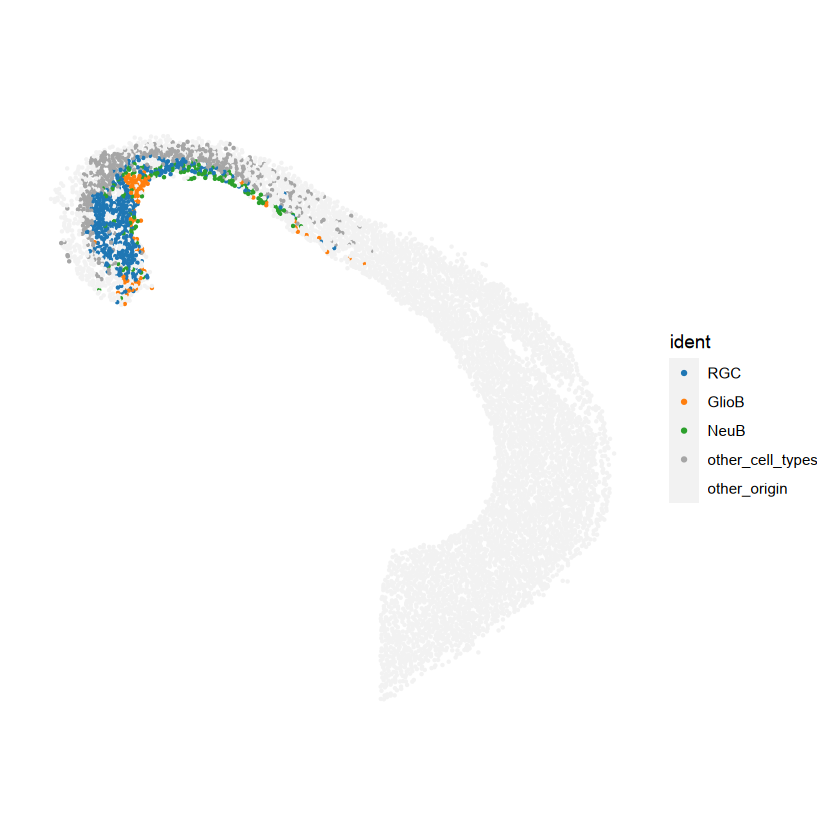

In [103]:
Idents(s2) <- 'E16_cell_type'
SpatialDimPlot(s2, stroke = NA, cols = cols.e16.high, pt.size.factor = 1.5) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_E16_E1S3_low_NT_RGC_offsprings.pdf')

In [104]:
s2$new_annot <- as.character(s2$annot)
s2$new_annot[s2$new_annot %in% c("GluNeuB", "GluNeu","GABA","Ery","Fibro","Endo","Basal")] <- 'other'

Saving 6.67 x 6.67 in image


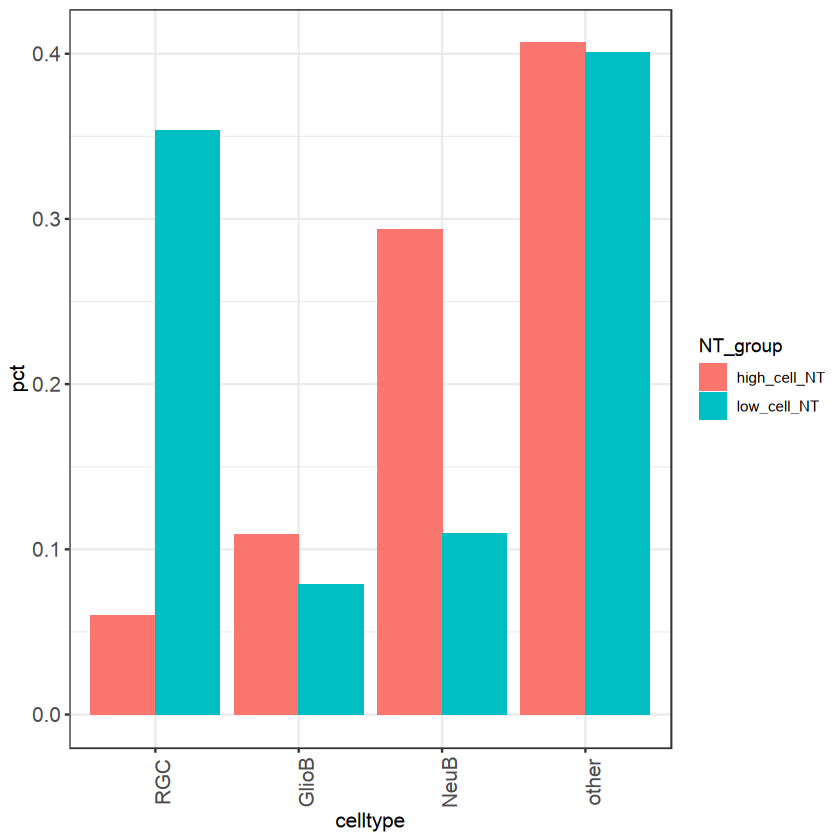

In [105]:
temp <- c(table(s2$new_annot[unique(intersect(cp.1.cells, Cells(s2)))])/length(unique(intersect(unlist(cp.1), Cells(s2)))),
          table(s2$new_annot[unique(intersect(cp.2.cells, Cells(s2)))])/length(unique(intersect(unlist(cp.2), Cells(s2)))))

plot.data <- data.frame(celltype = factor(names(temp),
                                          levels=c("RGC", "GlioB", "NeuB", "other")),
                        pct = temp,
                        NT_group = c(rep('high_cell_NT',times = 4),rep('low_cell_NT',times = 4)))

plot.data$NT_group <- factor(plot.data$NT_group)
ggplot(plot.data,aes(x = celltype,y = pct,fill = NT_group)) +
  geom_bar(stat = 'identity',position = position_dodge()) +
  theme_bw()+theme(axis.text.x = element_text(angle = 90),
                   axis.title = element_text(size = 12),
                   axis.text = element_text(size = 12),
                   legend.position = 'right')
ggsave('Barplot_cell_type_comparison_between_E14_E16_1_for_different_velocity_cells.pdf')

In [106]:
plot.data.2.1 <- plot.data

# E14.5 E1S3 -> E16.5 E2S6

## Load Moscot results

In [107]:
moscot.3 <- read.csv('../../../../SpatComTrajectory/analysis/stereo_seq_midbrain/Moscot/E14_E16_2_cm.csv',header = T,row.names = 1)
temp <- read.csv('../../../../SpatComTrajectory/source/Moscot/ss0_E14_E1S3_loc.csv',row.names = 1)
rownames(moscot.3) <- rownames(temp)
temp <- read.csv('../../../../SpatComTrajectory/source/Moscot/ss0_E16_E2S6_loc.csv',row.names = 1)
colnames(moscot.3) <- rownames(temp)

In [108]:
# progenitors by RNA in E14.5

moscot.use <- moscot.3

cells.use <- intersect(rownames(moscot.use), Cells(ss0)[ss0$annot %in% c('RGC')])
# split E14.5 progenitors into high vs low velocity
q.use <- 0.02
cells.1 <- Cells(ss0)[ss0$stage_annot_env_group == 'E14_RGC_high']
cells.2 <- Cells(ss0)[ss0$stage_annot_env_group == 'E14_RGC_low']
cells.1 <- intersect(cells.1, rownames(moscot.use))
cells.2 <- intersect(cells.2, rownames(moscot.use))
# s1 <- subset(ss0,cells = rownames(moscot.use))
# s1@images <- s1@images[2]
# s1$pr_type <- 'other'
# s1@meta.data[cells.1,'pr_type'] <- 'vhigh'
# s1@meta.data[cells.2,'pr_type'] <- 'vlow'
# s1$pr_type <- factor(s1$pr_type,levels = c('other','vlow','vhigh'))
# Idents(s1) <- 'pr_type'
# SpatialDimPlot(s1, stroke = NA, cols = cols.2, pt.size.factor = 2) + coord_flip() + scale_y_reverse()
# ggsave('Spatialplot_high_env_RGC_cells_E14.pdf')

In [109]:
## the up to 5 coupled E16.5 cells for every high velocity E14.5 progenitors
cp.1 <- lapply(cells.1,function(x){
  temp <- as.numeric(moscot.use[x,])
  names(temp) <- colnames(moscot.use)
  temp <- sort(temp,decreasing = T)
  head(names(temp[temp > 0]),5)
})

# the up to 5 coupled E16.5 cells for every low velocity E14.5 progenitors
cp.2 <- lapply(cells.2,function(x){
  temp <- as.numeric(moscot.use[x,])
  names(temp) <- colnames(moscot.use)
  temp <- sort(temp,decreasing = T)
  head(names(temp[temp > 0]),5)
})

In [110]:
cp.1.cells = setdiff(unlist(cp.1), unlist(cp.2))
cp.2.cells = setdiff(unlist(cp.2), unlist(cp.1))

## high offsprings

In [111]:
s3 <- subset(ss0,cells = colnames(moscot.use))
s3@images <- s3@images[4]
s3$RGC_origin <- 'non_RGC'
s3@meta.data[intersect(cp.1.cells, Cells(s3)),'RGC_origin'] <- 'NT_high'
s3@meta.data[intersect(cp.2.cells, Cells(s3)),'RGC_origin'] <- 'NT_low'


In [113]:
write.csv(s3@meta.data, 'E16_E2S6_meta.csv', quote=FALSE)

In [112]:
s3$E16_cell_type <- paste0(s3$RGC_origin, '_', s3$annot)
s3$E16_cell_type[s3$RGC_origin == 'non_RGC'] <- 'other_origin'
s3$E16_cell_type[s3$RGC_origin == 'NT_low'] <- 'other_origin'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_Basal'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_Ery'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_Fibro'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_Endo'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_GABA'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_GluNeu'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_GluNeuB'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_NeuB'] <- 'NeuB'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_GlioB'] <- 'GlioB'
s3$E16_cell_type[s3$E16_cell_type == 'NT_high_RGC'] <- 'RGC'

In [114]:
s3$E16_cell_type <- factor(s3$E16_cell_type,levels = c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin'))



Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


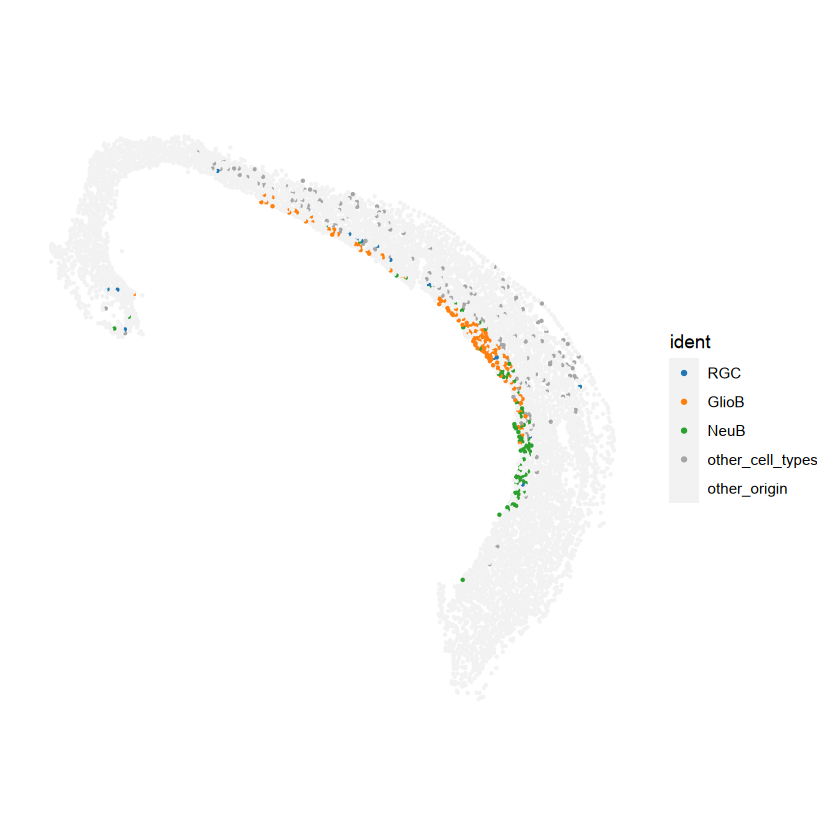

In [115]:
Idents(s3) <- 'E16_cell_type'
SpatialDimPlot(s3, stroke = NA, cols = cols.e16.high, pt.size.factor = 1.5) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_E16_S2S6_high_NT_RGC_offsprings.pdf')

## low offsprings

In [116]:
s3$E16_cell_type <- paste0(s3$RGC_origin, '_', s3$annot)
s3$E16_cell_type[s3$RGC_origin == 'non_RGC'] <- 'other_origin'
s3$E16_cell_type[s3$RGC_origin == 'NT_high'] <- 'other_origin'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_Basal'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_Ery'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_Fibro'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_Endo'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_GABA'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_GluNeu'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_GluNeuB'] <- 'other_cell_types'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_NeuB'] <- 'NeuB'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_GlioB'] <- 'GlioB'
s3$E16_cell_type[s3$E16_cell_type == 'NT_low_RGC'] <- 'RGC'

In [117]:
s3$E16_cell_type <- factor(s3$E16_cell_type,levels = c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin'))


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


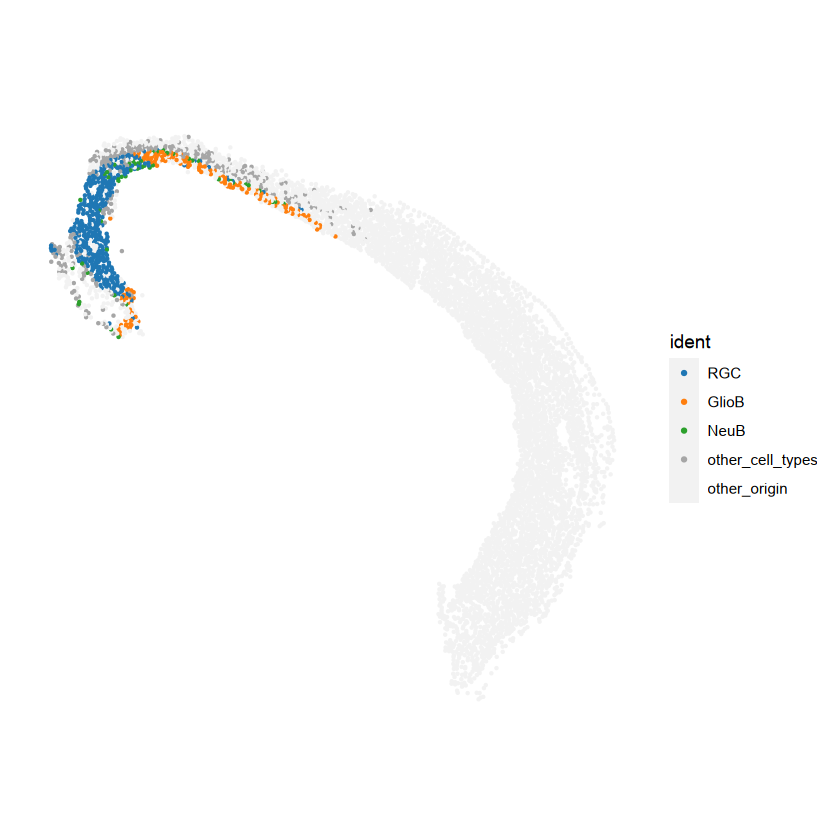

In [118]:
Idents(s3) <- 'E16_cell_type'
SpatialDimPlot(s3, stroke = NA, cols = cols.e16.high, pt.size.factor = 1.5) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_E16_S2S6_low_NT_RGC_offsprings.pdf')

## statistics

In [119]:
s3$new_annot <- as.character(s3$annot)
s3$new_annot[s3$new_annot %in% c("GluNeuB", "GluNeu","GABA","Ery","Fibro","Endo","Basal")] <- 'other'

Saving 6.67 x 6.67 in image


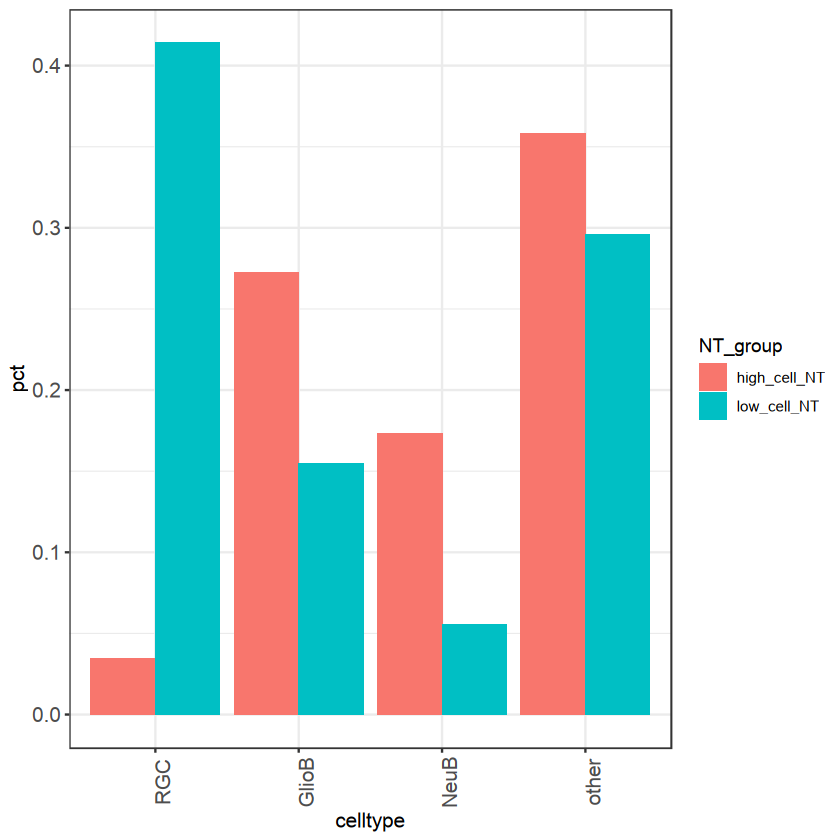

In [120]:
temp <- c(table(s3$new_annot[unique(intersect(cp.1.cells, Cells(s3)))])/length(unique(intersect(unlist(cp.1), Cells(s3)))),
          table(s3$new_annot[unique(intersect(cp.2.cells, Cells(s3)))])/length(unique(intersect(unlist(cp.2), Cells(s3)))))

plot.data <- data.frame(celltype = factor(names(temp),
                                          levels=c("RGC", "GlioB", "NeuB", "other")),
                        pct = temp,
                        NT_group = c(rep('high_cell_NT',times = 4),rep('low_cell_NT',times = 4)))

plot.data$NT_group <- factor(plot.data$NT_group)
ggplot(plot.data,aes(x = celltype,y = pct,fill = NT_group)) +
  geom_bar(stat = 'identity',position = position_dodge()) +
  theme_bw()+theme(axis.text.x = element_text(angle = 90),
                   axis.title = element_text(size = 12),
                   axis.text = element_text(size = 12),
                   legend.position = 'right')
ggsave('Barplot_cell_type_comparison_between_E14_E16_2_for_different_velocity_cells.pdf')

In [121]:
plot.data.2.2 <- plot.data

# E14.5 E1S3 -> E16.5 E2S7

## Load Moscot results

In [122]:
moscot.4 <- read.csv('../../../../SpatComTrajectory/analysis/stereo_seq_midbrain/Moscot/E14_E16_3_cm.csv',header = T,row.names = 1)
temp <- read.csv('../../../../SpatComTrajectory/source/Moscot/ss0_E14_E1S3_loc.csv',row.names = 1)
rownames(moscot.4) <- rownames(temp)
temp <- read.csv('../../../../SpatComTrajectory/source/Moscot/ss0_E16_E2S7_loc.csv',row.names = 1)
colnames(moscot.4) <- rownames(temp)

In [123]:
# progenitors by RNA in E14.5

moscot.use <- moscot.4

cells.use <- intersect(rownames(moscot.use), Cells(ss0)[ss0$annot %in% c('RGC')])
# split E14.5 progenitors into high vs low velocity
q.use <- 0.02
cells.1 <- Cells(ss0)[ss0$stage_annot_env_group == 'E14_RGC_high']
cells.2 <- Cells(ss0)[ss0$stage_annot_env_group == 'E14_RGC_low']
cells.1 <- intersect(cells.1, rownames(moscot.use))
cells.2 <- intersect(cells.2, rownames(moscot.use))
s1 <- subset(ss0,cells = rownames(moscot.use))
s1@images <- s1@images[2]
s1$pr_type <- 'other'
s1@meta.data[cells.1,'pr_type'] <- 'vhigh'
s1@meta.data[cells.2,'pr_type'] <- 'vlow'
s1$pr_type <- factor(s1$pr_type,levels = c('other','vlow','vhigh'))
Idents(s1) <- 'pr_type'
# SpatialDimPlot(s1, stroke = NA, cols = cols.2, pt.size.factor = 2) + coord_flip() + scale_y_reverse()
# ggsave('Spatialplot_high_env_RGC_cells_E14.pdf')

In [124]:
## the up to 5 coupled E16.5 cells for every high velocity E14.5 progenitors
cp.1 <- lapply(cells.1,function(x){
  temp <- as.numeric(moscot.use[x,])
  names(temp) <- colnames(moscot.use)
  temp <- sort(temp,decreasing = T)
  head(names(temp[temp > 0]),5)
})

# the up to 5 coupled E16.5 cells for every low velocity E14.5 progenitors
cp.2 <- lapply(cells.2,function(x){
  temp <- as.numeric(moscot.use[x,])
  names(temp) <- colnames(moscot.use)
  temp <- sort(temp,decreasing = T)
  head(names(temp[temp > 0]),5)
})

In [125]:
cp.1.cells = setdiff(unlist(cp.1), unlist(cp.2))
cp.2.cells = setdiff(unlist(cp.2), unlist(cp.1))

## high offsprings

In [126]:
s4 <- subset(ss0,cells = colnames(moscot.use))
s4@images <- s4@images[5]
s4$RGC_origin <- 'non_RGC'
s4@meta.data[intersect(cp.1.cells, Cells(s4)),'RGC_origin'] <- 'NT_high'
s4@meta.data[intersect(cp.2.cells, Cells(s4)),'RGC_origin'] <- 'NT_low'


In [127]:
write.csv(s4@meta.data, 'E16_E2S7_meta.csv', quote=FALSE)

In [128]:
s4$E16_cell_type <- paste0(s4$RGC_origin, '_', s4$annot)
s4$E16_cell_type[s4$RGC_origin == 'non_RGC'] <- 'other_origin'
s4$E16_cell_type[s4$RGC_origin == 'NT_low'] <- 'other_origin'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_Basal'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_Ery'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_Fibro'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_Endo'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_GABA'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_GluNeu'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_GluNeuB'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_NeuB'] <- 'NeuB'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_GlioB'] <- 'GlioB'
s4$E16_cell_type[s4$E16_cell_type == 'NT_high_RGC'] <- 'RGC'

In [129]:
s4$E16_cell_type <- factor(s4$E16_cell_type,levels = c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin'))



Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


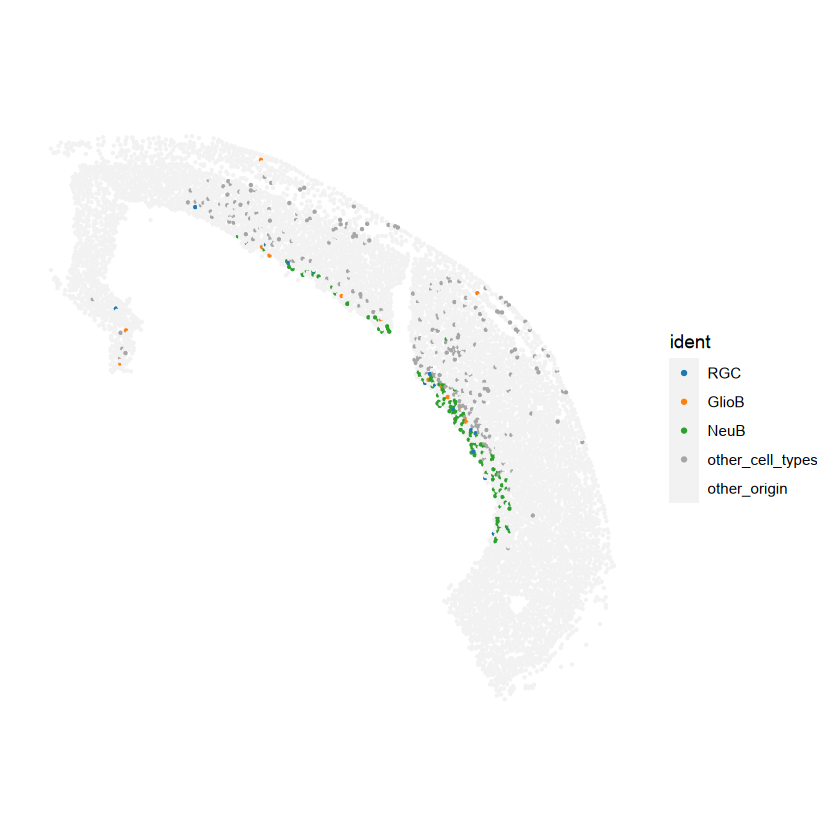

In [130]:
Idents(s4) <- 'E16_cell_type'
SpatialDimPlot(s4, stroke = NA, cols = cols.e16.high, pt.size.factor = 1.5) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_E16_S2S7_high_NT_RGC_offsprings.pdf')

## low offsprings

In [131]:
s4$E16_cell_type <- paste0(s4$RGC_origin, '_', s4$annot)
s4$E16_cell_type[s4$RGC_origin == 'non_RGC'] <- 'other_origin'
s4$E16_cell_type[s4$RGC_origin == 'NT_high'] <- 'other_origin'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_Basal'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_Ery'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_Fibro'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_Endo'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_GABA'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_GluNeu'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_GluNeuB'] <- 'other_cell_types'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_NeuB'] <- 'NeuB'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_GlioB'] <- 'GlioB'
s4$E16_cell_type[s4$E16_cell_type == 'NT_low_RGC'] <- 'RGC'

In [132]:
s4$E16_cell_type <- factor(s4$E16_cell_type,levels = c('RGC', 'GlioB', 'NeuB', 'other_cell_types', 'other_origin'))


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Saving 6.67 x 6.67 in image


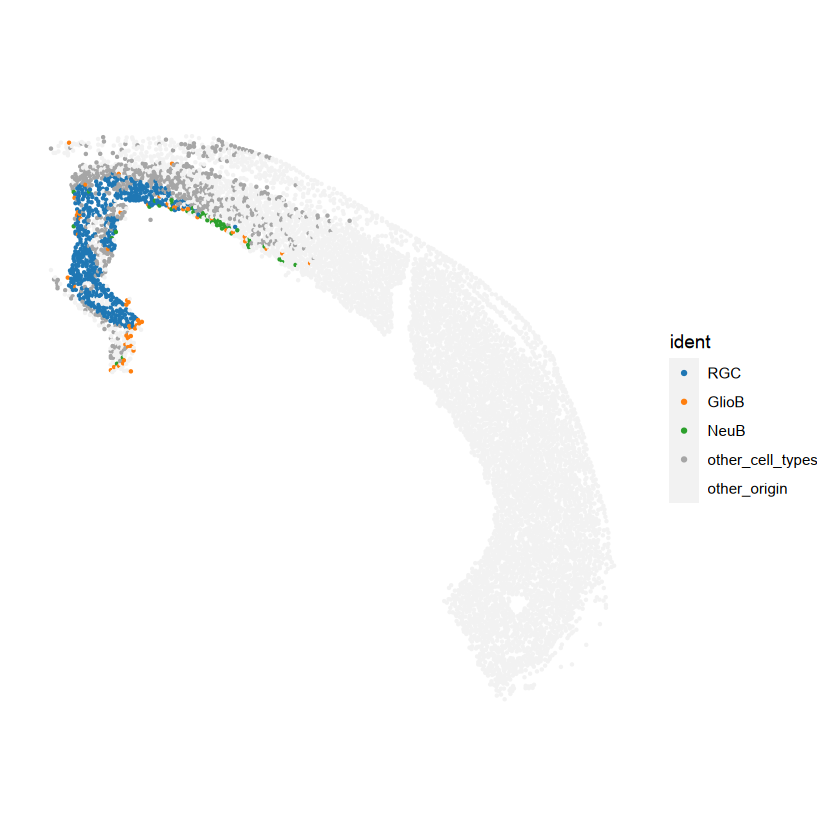

In [133]:
Idents(s4) <- 'E16_cell_type'
SpatialDimPlot(s4, stroke = NA, cols = cols.e16.high, pt.size.factor = 1.5) + coord_flip() + scale_y_reverse()
ggsave('Spatialplot_E16_S2S7_low_NT_RGC_offsprings.pdf')

## statistics

In [134]:
s4$new_annot <- as.character(s4$annot)
s4$new_annot[s4$new_annot %in% c("GluNeuB", "GluNeu","GABA","Ery","Fibro","Endo","Basal")] <- 'other'

Saving 6.67 x 6.67 in image


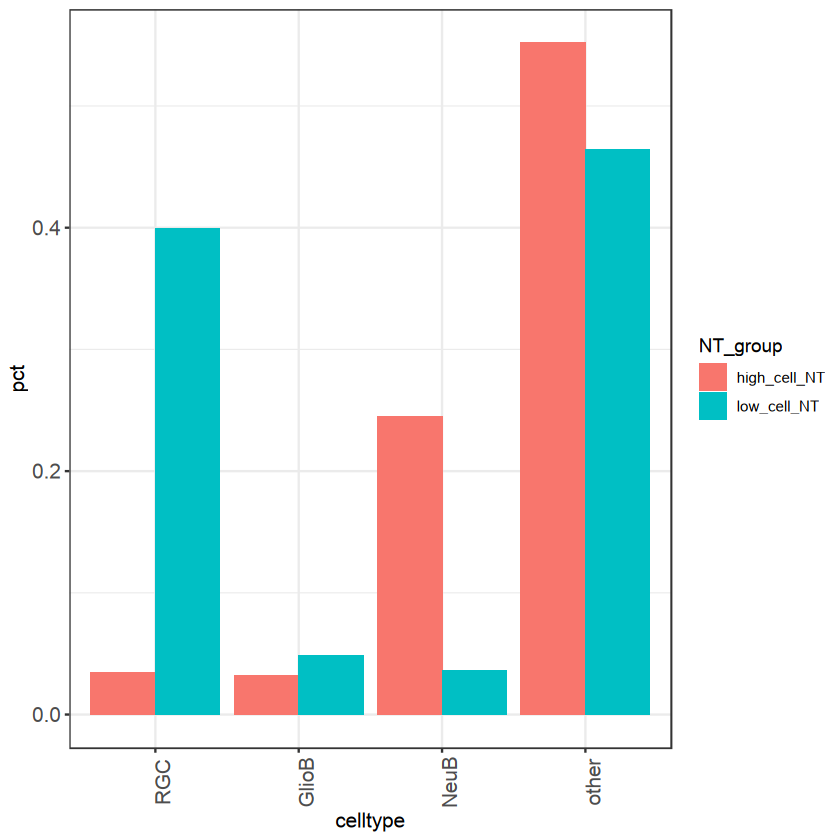

In [135]:
temp <- c(table(s4$new_annot[unique(intersect(cp.1.cells, Cells(s4)))])/length(unique(intersect(unlist(cp.1), Cells(s4)))),
          table(s4$new_annot[unique(intersect(cp.2.cells, Cells(s4)))])/length(unique(intersect(unlist(cp.2), Cells(s4)))))

plot.data <- data.frame(celltype = factor(names(temp),
                                          levels=c("RGC", "GlioB", "NeuB", "other")),
                        pct = temp,
                        NT_group = c(rep('high_cell_NT',times = 4),rep('low_cell_NT',times = 4)))

plot.data$NT_group <- factor(plot.data$NT_group)
ggplot(plot.data,aes(x = celltype,y = pct,fill = NT_group)) +
  geom_bar(stat = 'identity',position = position_dodge()) +
  theme_bw()+theme(axis.text.x = element_text(angle = 90),
                   axis.title = element_text(size = 12),
                   axis.text = element_text(size = 12),
                   legend.position = 'right')
ggsave('Barplot_cell_type_comparison_between_E14_E16_3_for_different_velocity_cells.pdf')

In [136]:
plot.data.2.3 <- plot.data

# statistic

In [139]:
plot.data.2.1$source <- 'DF1'
plot.data.2.2$source <- 'DF2'
plot.data.2.3$source <- 'DF3'

In [140]:
plot.data <- rbind(plot.data.2.1,plot.data.2.2,plot.data.2.3)

In [141]:
plot.data$NT_group <- factor(plot.data$NT_group, levels=c('low_cell_NT', 'high_cell_NT'))

In [142]:
head(plot.data)

,celltype,pct,NT_group,source
,<fct>,<dbl>,<fct>,<chr>
1,GlioB,0.10888889,high_cell_NT,DF1
2,NeuB,0.29333333,high_cell_NT,DF1
3,other,0.40666667,high_cell_NT,DF1
4,RGC,0.06000000,high_cell_NT,DF1
5,GlioB,0.07899807,low_cell_NT,DF1
6,NeuB,0.10982659,low_cell_NT,DF1


In [143]:
plot.data

celltype,pct,NT_group,source
<fct>,<dbl>,<fct>,<chr>
GlioB,0.10888889,high_cell_NT,DF1
NeuB,0.29333333,high_cell_NT,DF1
other,0.40666667,high_cell_NT,DF1
RGC,0.06000000,high_cell_NT,DF1
GlioB,0.07899807,low_cell_NT,DF1
NeuB,0.10982659,low_cell_NT,DF1
other,0.40077071,low_cell_NT,DF1
RGC,0.35356455,low_cell_NT,DF1
GlioB,0.27251732,high_cell_NT,DF2


In [144]:
write.csv(plot.data, 'OT_summary.csv')

In [145]:
# grouped_df <- combined_df %>%
#   group_by(celltype, pr_type, source) %>%
#   summarize(mean_pct = mean(pct), se_pct = sd(pct) / sqrt(n()))

In [146]:
library(dplyr)

grouped_df <- plot.data %>%
   group_by(celltype, NT_group) %>%
   summarize(mean_pct = mean(pct), se_pct = sd(pct) / sqrt(n()), .groups="drop")

In [147]:
grouped_df$celltype %in% c("RGC", "GlioB", "NeuB", "other")

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [148]:
grouped_df <- grouped_df[grouped_df$celltype %in% c("RGC", "GlioB", "NeuB","other"),]

In [149]:
grouped_df

celltype,NT_group,mean_pct,se_pct
<fct>,<fct>,<dbl>,<dbl>
RGC,low_cell_NT,0.38910646,0.018254558
RGC,high_cell_NT,0.04309469,0.008452656
GlioB,low_cell_NT,0.09404495,0.031596604
GlioB,high_cell_NT,0.13791292,0.070837785
NeuB,low_cell_NT,0.06722110,0.022045308
NeuB,high_cell_NT,0.23711573,0.034888980
other,low_cell_NT,0.38682328,0.049029906
other,high_cell_NT,0.43886579,0.058269889


Saving 6.67 x 6.67 in image


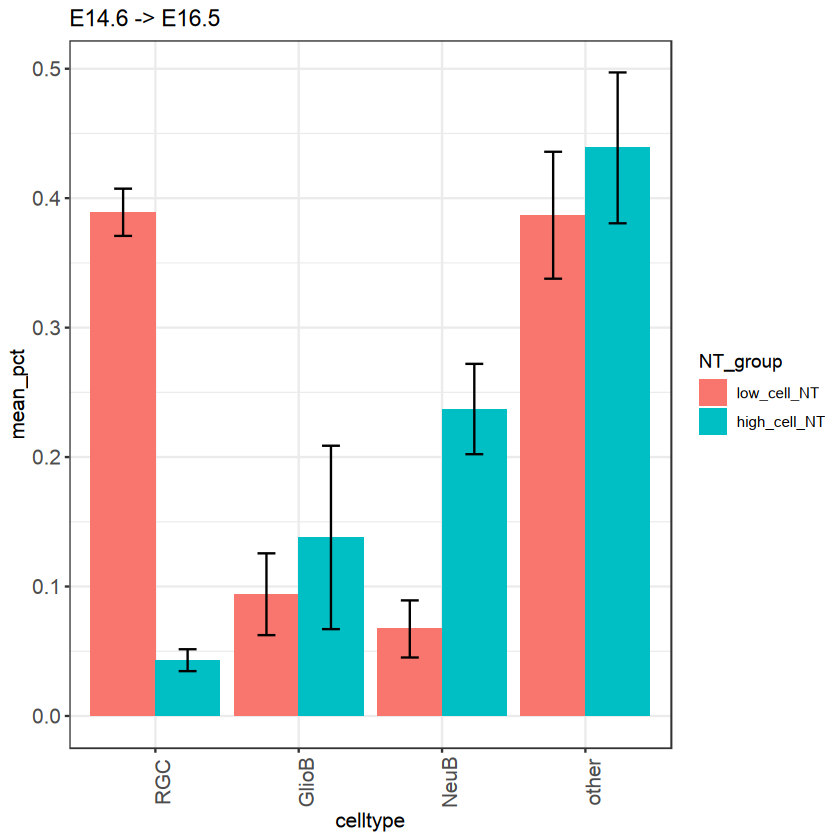

In [150]:
ggplot(grouped_df,aes(x = celltype,y = mean_pct,fill = NT_group)) +
  geom_bar(stat = 'identity',position = position_dodge()) +
  geom_errorbar(aes(ymin = mean_pct - se_pct, ymax = mean_pct + se_pct), 
                position = position_dodge(.9), width = .25) +
  ggtitle('E14.6 -> E16.5') +
  theme_bw()+theme(axis.text.x = element_text(angle = 90),
                   axis.title = element_text(size = 12),
                   axis.text = element_text(size = 12),
                   legend.position = 'right')
ggsave('Barplot_cell_type_comparison_between_E14_E16_for_different_velocity_cells.pdf')

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `complete.cases()`:
! not all arguments have the same length”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `complete.cases()`:
! not all arguments have the same length”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


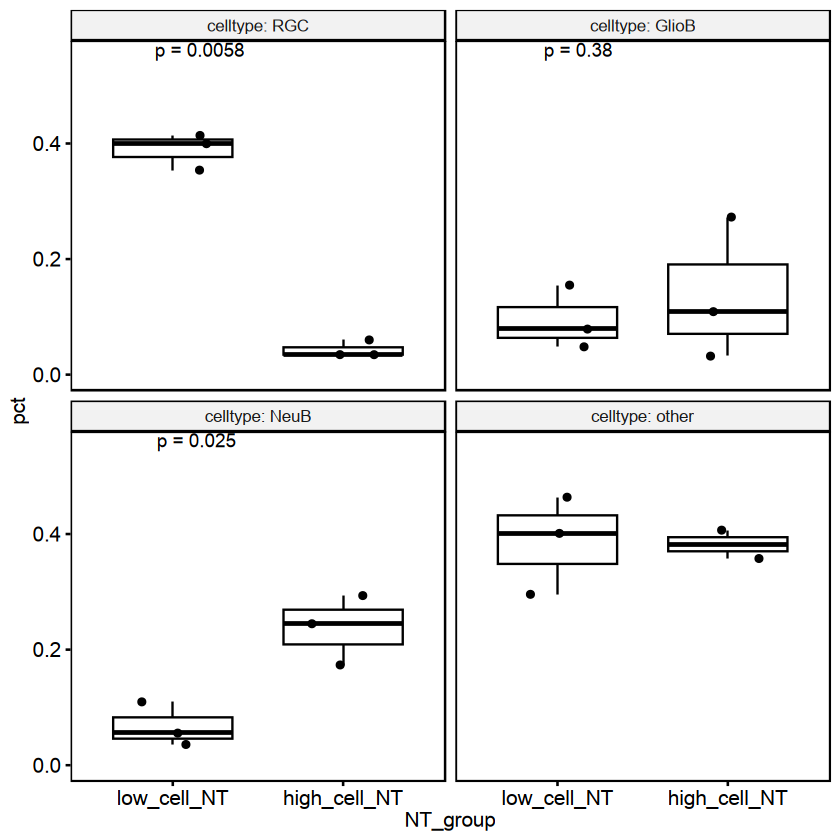

In [151]:
p <- ggpubr::ggboxplot(plot.data[plot.data$celltype %in% c("RGC", "GlioB", "NeuB", "other"),], x = "NT_group", y = "pct",
          # color = "NT_group",# palette = "jco",
          add = "jitter",
          facet.by = "celltype", short.panel.labs = FALSE) + ylim(0, 0.55)
# Use only p.format as label. Remove method name.
p + ggpubr::stat_compare_means(method = "t.test", label = "p.format", paired=TRUE)
ggsave('Barplot_cell_type_comparison_between_E14_E16_for_different_velocity_cells_with_statistics.pdf')

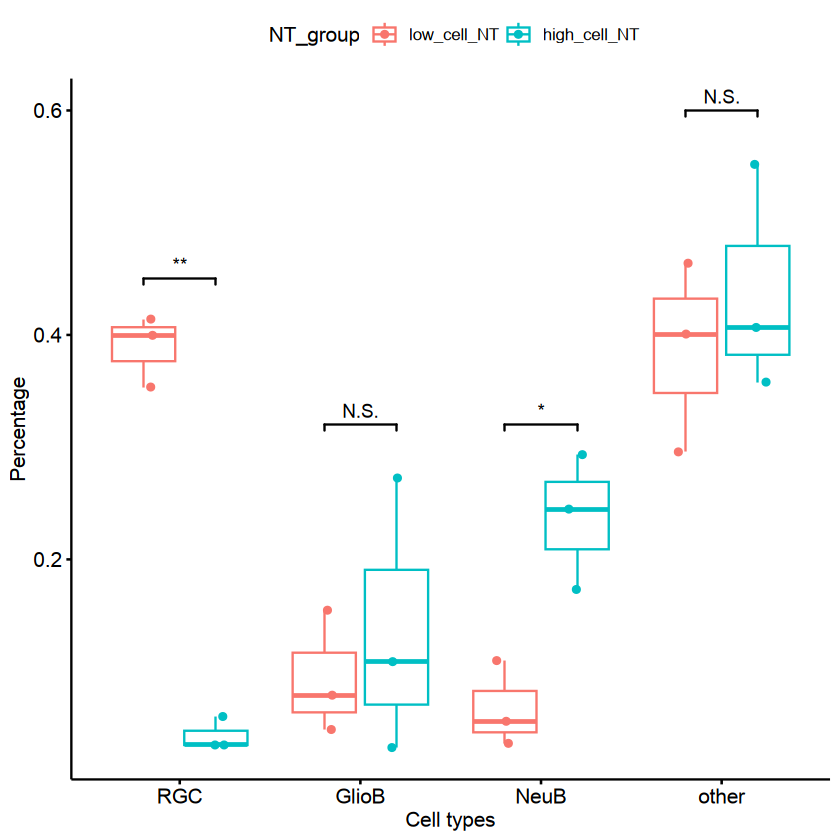

In [153]:
ggpubr::ggboxplot(plot.data[plot.data$celltype %in% c("RGC", "GlioB", "NeuB", "other"),], x = "celltype", y = "pct",
          color = "NT_group",
          add = "jitter") +
  geom_signif(
    y_position = c(0.45, 0.32, 0.32, 0.6), xmin = 0.8 + 0:3, xmax = 1.2 + 0:3,
    annotation = c("**", "N.S.", "*", "N.S."), tip_length = 0.01
  ) +
  xlab("Cell types") + ylab("Percentage")
ggsave('boxplot_statistics_four_group.pdf', width = 3.5, height = 2.8, units = "in")